# Import dataset and packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn import metrics

In [2]:
#import dataset
dataset= pd.read_csv("C:/Users/coderflo1/Desktop/SouthGermanCredit/dat.csv",low_memory=False)

In [3]:
dataset.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


# Encoding categorical variables

In [4]:
# convert credit_risk to binary: good=1, bad=0
dataset['credit_risk']=dataset['credit_risk'].map(dict(good=1, bad=0))
dataset.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,1
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,1
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,1
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,1
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,1


In [5]:
#change credit_risk from string to int to prepare for log regression
dataset["credit_risk"]=pd.to_numeric(dataset["credit_risk"])

In [6]:
#create dummies for status and drop first column. 
status_1=pd.get_dummies(dataset["status"],drop_first=True)
status_1.head()

,... >= 200 DM / salary for at least 1 year,0<= ... < 200 DM,no checking account
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,1
4,0,0,1


In [7]:
#create dummies for credit history and drop first column 
credit_history_1=pd.get_dummies(dataset["credit_history"],drop_first=True)
credit_history_1.head()

,critical account/other credits elsewhere,delay in paying off in the past,existing credits paid back duly till now,no credits taken/all credits paid back duly
0,0,0,0,0
1,0,0,0,0
2,0,0,0,1
3,0,0,0,0
4,0,0,0,0


In [8]:
#create dummies for purpose and drop first column 
purpose_1=pd.get_dummies(dataset["purpose"],drop_first=True)
purpose_1.head()

,car (new),car (used),domestic appliances,furniture/equipment,others,radio/television,repairs,retraining,vacation
0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [9]:
#create dummies for savings and drop first column 
savings_1=pd.get_dummies(dataset["savings"],drop_first=True)
savings_1.head()

,... >= 1000 DM,100 <= ... < 500 DM,500 <= ... < 1000 DM,unknown/no savings account
0,0,0,0,1
1,0,0,0,1
2,0,0,0,0
3,0,0,0,1
4,0,0,0,1


In [10]:
#create dummies for property and drop first column 
property_1=pd.get_dummies(dataset["property"],drop_first=True)
property_1.head()

,car or other,real estate,unknown / no property
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [11]:
# add dummy columns to dataset
dataset1=pd.concat([dataset,status_1,credit_history_1,purpose_1,savings_1,property_1],axis=1)
dataset1.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,repairs,retraining,vacation,... >= 1000 DM,100 <= ... < 500 DM,500 <= ... < 1000 DM,unknown/no savings account,car or other,real estate,unknown / no property
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,0,0,0,0,0,0,1,1,0,0
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,0,0,0,0,0,0,1,0,0,1
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,0,1,0,0,0,0,0,0,0,1
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,0,0,0,0,0,0,1,0,0,1
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,0,0,0,0,0,0,1,1,0,0


In [12]:
# drop columns not used for log regression
dataset2= dataset1.drop(['status','credit_history','purpose','savings','employment_duration','installment_rate','personal_status_sex','other_debtors','present_residence','property','other_installment_plans','housing','number_credits','job','people_liable','telephone','foreign_worker'],axis=1,inplace=False)

In [13]:
#check new dataset for log regression
dataset2.head()

,duration,amount,age,credit_risk,... >= 200 DM / salary for at least 1 year,0<= ... < 200 DM,no checking account,critical account/other credits elsewhere,delay in paying off in the past,existing credits paid back duly till now,...,repairs,retraining,vacation,... >= 1000 DM,100 <= ... < 500 DM,500 <= ... < 1000 DM,unknown/no savings account,car or other,real estate,unknown / no property
0,18,1049,21,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,9,2799,36,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,12,841,23,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,12,2122,39,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,12,2171,38,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


# Logistic Regression before oversampling

In [14]:
#Define x and y
X = dataset2.drop(["credit_risk"], axis=1)
y = dataset2["credit_risk"]

In [15]:
from sklearn import model_selection
#split train 80% and test 20%
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2,random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression

# fit model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions=logmodel.predict(X_test)

C:\Users\happy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.39      0.47        62
           1       0.76      0.88      0.82       138

    accuracy                           0.73       200
   macro avg       0.68      0.64      0.64       200
weighted avg       0.71      0.73      0.71       200

[[ 24  38]
 [ 16 122]]


Text(0.5, 15.0, 'Predictions')

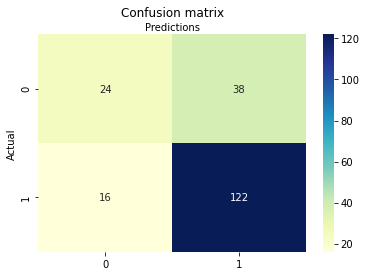

In [18]:
from sklearn.metrics import confusion_matrix

con_matrix = metrics.confusion_matrix(y_test, predictions)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(con_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predictions')

# Use SMOTE to oversample minority class

In [19]:
# SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy= 0.8,random_state = 42)

In [20]:
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [21]:
# Check class ratio
from collections import Counter

counter1 = Counter(y_train)
counter2 = Counter(y_train_resampled)
print(counter1)
print(counter2)

Counter({1: 562, 0: 238})
Counter({1: 562, 0: 449})


# Logistic Regression after oversampling

In [22]:
from sklearn.linear_model import LogisticRegression

# fit model
logmodel_1 = LogisticRegression()
logmodel_1.fit(X_train_resampled, y_train_resampled)
predictions_1=logmodel_1.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, predictions_1))
print(metrics.confusion_matrix(y_test, predictions_1))

              precision    recall  f1-score   support

           0       0.60      0.58      0.59        62
           1       0.81      0.83      0.82       138

    accuracy                           0.75       200
   macro avg       0.71      0.70      0.71       200
weighted avg       0.75      0.75      0.75       200

[[ 36  26]
 [ 24 114]]


Text(0.5, 15.0, 'Predictions')

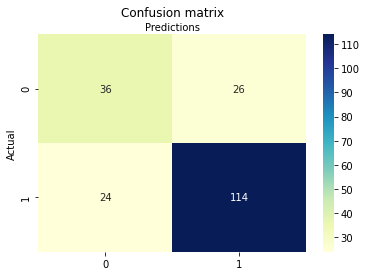

In [24]:
from sklearn.metrics import confusion_matrix

con_matrix = metrics.confusion_matrix(y_test, predictions_1)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(con_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predictions')